<a href="https://colab.research.google.com/github/rodrigoviannini/Analysis_Data/blob/main/rodrigo_viannini_planejamento_an%C3%A1lise_dados_experimentais_20230613a.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Planejamento e Análise de Dados Experimentais - PEA 801


Lista de exercícios - feita com Minitab ou similar de preferência do aluno


a. Exercícios do capítulo 13 e 14 do livro Introduction to Statistical Quality
Control, Montgomery.


i. 13.16 (pag 599)


ii. 13.17 (pag 600)


iii. 13.18 (pag 600)


iv. 13.19 (pag 600)


v. 13.20 (pag 601)


vi. 14.5 (pag 625)


vii. 14.7 (pag 626)


viii. 14.8 (pag 627)

NOME: RODRIGO A VIANNINI


DRE:  122008847


E-MAIL: rodrigo.viannini@pep.ufrj.br


LINKEDIN: https://www.linkedin.com/in/rodrigoviannini/

#13.16.

An engineer has performed an experiment to study
the effect of four factors on the surface roughness of
a machined part. The factors (and their levels) are
A = tool angle (12, 15), B = cutting fluid viscosity
(300, 400), C = feed rate (10, 15 in/min), and
D = cutting fluid cooler used (no, yes). The data from
this experiment (with the factors coded to the usual
+1, −1 levels) are shown in Table 13E.5.
(a) Estimate the factor effects. Plot the effect estimates on a normal probability plot and select a
tentative model.


---


Um engenheiro realizou um experimento para estudar o efeito de quatro fatores na rugosidade da superfície de uma peça usinada. Os fatores (e seus níveis) são A = ângulo da ferramenta (12, 15), B = viscosidade do fluido de corte (300, 400), C = taxa de avanço (10, 15 in/min) e D = refrigerador do fluido de corte usado ( não, sim). Os dados desse experimento (com os fatores codificados nos níveis usuais +1, -1) são mostrados na Tabela 13E.5. (a) Estime os efeitos dos fatores. Plote as estimativas de efeito em um gráfico de probabilidade normal e selecione um modelo provisório.

In [65]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

In [62]:
# Tabela 13E.5
data = {
    'A': [1, 1, -1, -1, 1, 1, -1, -1, 1, 1, -1, -1, 1, 1, -1, -1],
    'B': [1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1],
    'C': [1, -1, -1, 1, -1, 1, 1, -1, 1, -1, -1, 1, -1, 1, 1, -1],
    'D': [-1, 1, -1, 1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1],
    'Surface Roughness': [0.00340, 0.00362, 0.00301, 0.00182, 0.00280, 0.00290, 0.00252, 0.00160,
                           0.00336, 0.00344, 0.00308, 0.00184, 0.00269, 0.00284, 0.00253, 0.0016]
}

df = pd.DataFrame(data)

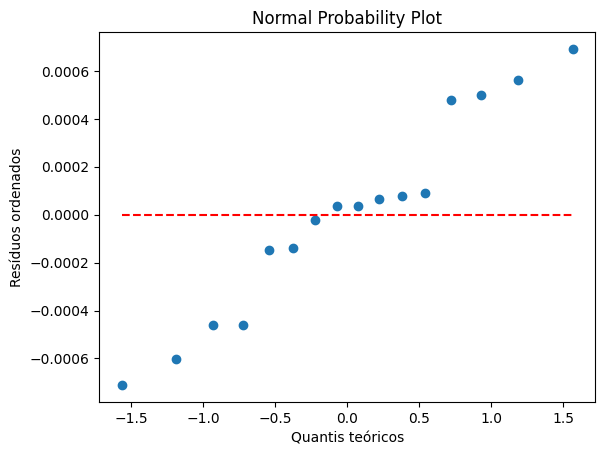

Estimativas de Efeito:
A: 0.0004406249999999998
B: 0.00023625000000000013
C: -3.937500000000002e-05
D: -6.250000000000369e-06


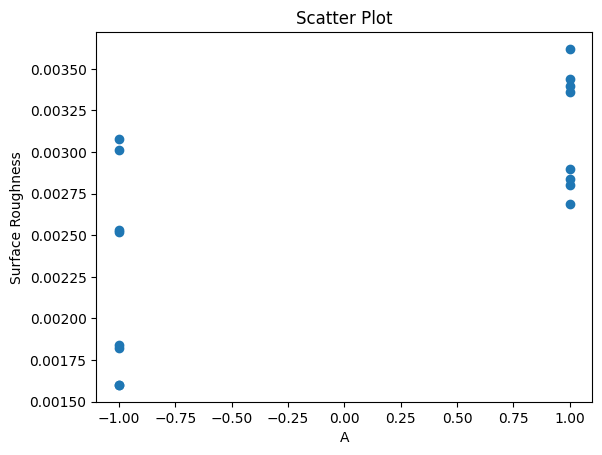

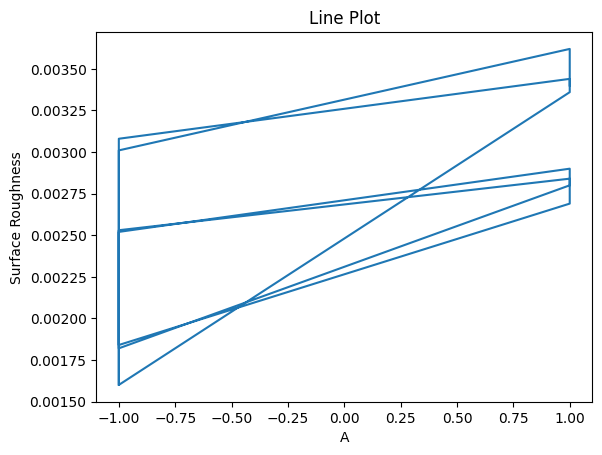

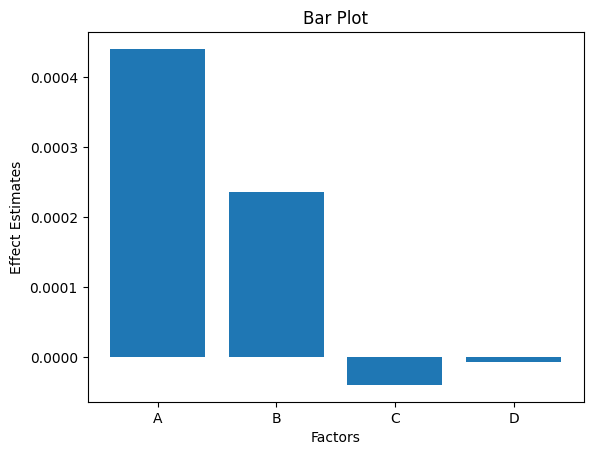

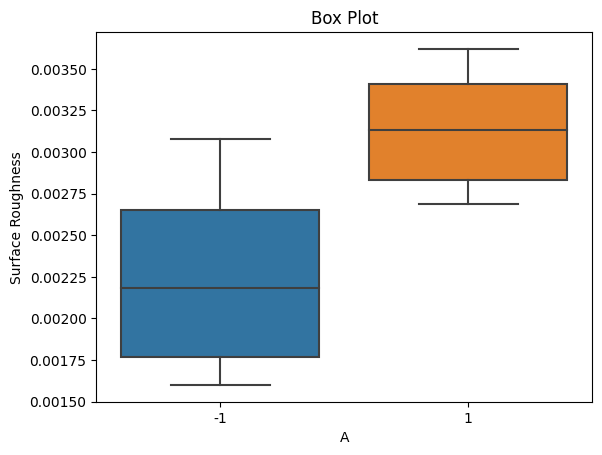

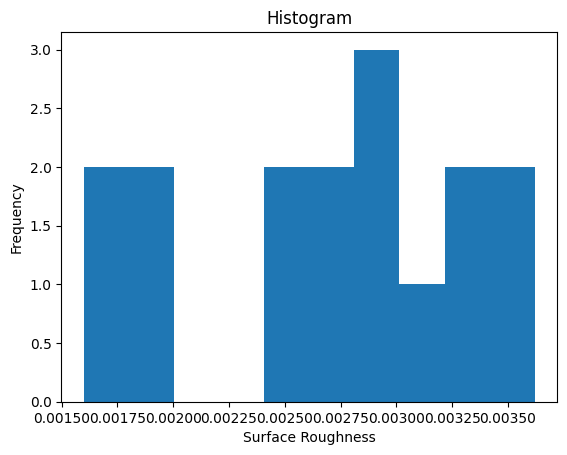

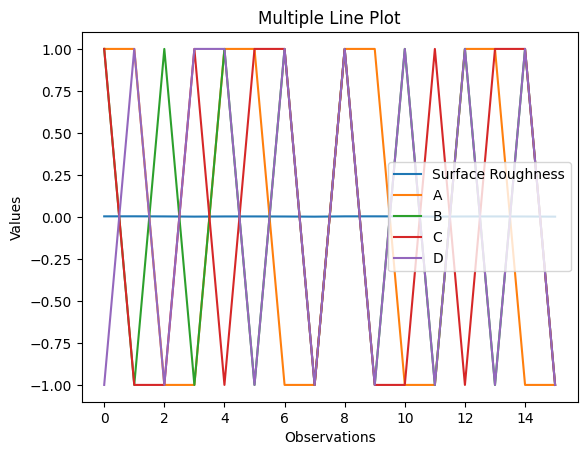

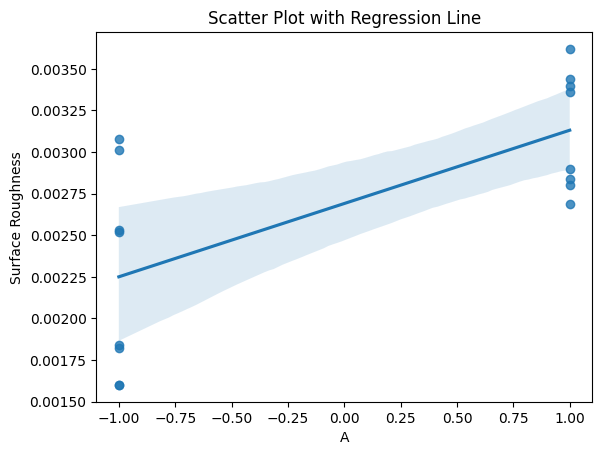

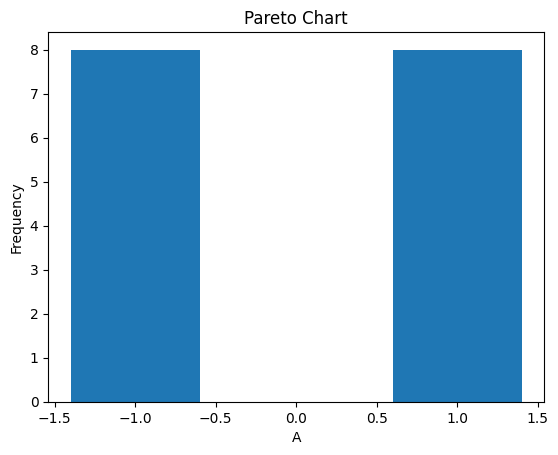

In [63]:
X = df[['A', 'B', 'C', 'D']]
X = sm.add_constant(X)  # Adicionar uma coluna de 1s para o termo de intercepção

# Target
y = df['Surface Roughness']

# Model
model = sm.OLS(y, X).fit()

# Estimar os efeitos dos fatores
effect_estimates = model.params[1:]

# Graficos
residuals = model.resid
sorted_residuals = np.sort(residuals)
norm_residuals = stats.norm.ppf((np.arange(len(sorted_residuals)) + 1) / (len(sorted_residuals) + 1))

plt.scatter(norm_residuals, sorted_residuals)
plt.plot(norm_residuals, norm_residuals * 0, color='r', linestyle='--')
plt.xlabel('Quantis teóricos')
plt.ylabel('Resíduos ordenados')
plt.title('Normal Probability Plot')
plt.show()


print("Estimativas de Efeito:")
for factor, estimate in zip(X.columns[1:], effect_estimates):
    print(f'{factor}: {estimate}')

"""##OUTROS GRÁFICOS

###Gráfico de dispersão (scatter plot):

Gráfico de dispersão (scatter plot):

O gráfico de dispersão mostra a relação entre as variáveis "A" (fator) e "Surface Roughness" (rugosidade da superfície). Cada ponto no gráfico representa uma observação do experimento. Podemos observar a dispersão dos pontos e visualizar a tendência ou padrões na relação entre as variáveis.
"""



plt.scatter(df['A'], df['Surface Roughness'])
plt.xlabel('A')
plt.ylabel('Surface Roughness')
plt.title('Scatter Plot')
plt.show()

"""###Gráfico de linha (line plot):

Gráfico de linha (line plot):

O gráfico de linha mostra a relação entre a variável "A" (fator) e "Surface Roughness" (rugosidade da superfície) como uma linha contínua. Ele nos permite visualizar a tendência ou padrão ao longo do fator "A".
"""

plt.plot(df['A'], df['Surface Roughness'])
plt.xlabel('A')
plt.ylabel('Surface Roughness')
plt.title('Line Plot')
plt.show()

"""###Gráfico de barras (bar plot):

Gráfico de barras (bar plot):

O gráfico de barras exibe as estimativas de efeito dos fatores (A, B, C, D) no eixo y em relação ao eixo x, que representa os fatores. Cada barra representa o efeito estimado de um fator específico. Podemos observar a magnitude dos efeitos e comparar entre os fatores.
"""

factor_labels = ['A', 'B', 'C', 'D']
effect_estimates = model.params[1:]

plt.bar(factor_labels, effect_estimates)
plt.xlabel('Factors')
plt.ylabel('Effect Estimates')
plt.title('Bar Plot')
plt.show()

"""###Gráfico de caixa (box plot):

Gráfico de caixa (box plot):

O gráfico de caixa mostra a distribuição dos valores da variável "Surface Roughness" (rugosidade da superfície) para cada nível do fator "A". Ele exibe a mediana (linha no meio da caixa), o intervalo interquartil (caixa) e os valores atípicos (pontos além das "whiskers"). Podemos comparar as distribuições entre os níveis do fator "A" e identificar possíveis diferenças na rugosidade da superfície.
"""



sns.boxplot(x='A', y='Surface Roughness', data=df)
plt.xlabel('A')
plt.ylabel('Surface Roughness')
plt.title('Box Plot')
plt.show()

"""###Histograma:

Histograma:

O histograma exibe a distribuição dos valores da variável "Surface Roughness" (rugosidade da superfície). Ele divide a faixa de valores em intervalos (bins) e mostra a frequência de ocorrência de valores em cada intervalo. Podemos observar a forma da distribuição e identificar se ela se assemelha a uma distribuição normal ou possui alguma característica específica.
"""

plt.hist(df['Surface Roughness'], bins=10)
plt.xlabel('Surface Roughness')
plt.ylabel('Frequency')
plt.title('Histogram')
plt.show()

"""###Gráfico de linha múltipla:

Gráfico de linha múltipla:

O gráfico de linha múltipla mostra a variação ao longo das observações para várias variáveis: "Surface Roughness" (rugosidade da superfície) e os níveis dos fatores A, B, C e D. Cada linha representa uma variável e seu valor correspondente em cada observação. Podemos visualizar a tendência e a relação entre as variáveis ao longo das observações.
"""

plt.plot(df['Surface Roughness'], label='Surface Roughness')
plt.plot(df['A'], label='A')
plt.plot(df['B'], label='B')
plt.plot(df['C'], label='C')
plt.plot(df['D'], label='D')
plt.xlabel('Observations')
plt.ylabel('Values')
plt.title('Multiple Line Plot')
plt.legend()
plt.show()

"""###Gráfico de dispersão com regressão:

Gráfico de dispersão com regressão:

O gráfico de dispersão com regressão exibe a relação entre a variável "A" (fator) e "Surface Roughness" (rugosidade da superfície) juntamente com uma linha de regressão que representa a tendência geral da relação. A linha de regressão ajuda a identificar a direção e a força da relação entre as variáveis.
"""

sns.regplot(x='A', y='Surface Roughness', data=df)
plt.xlabel('A')
plt.ylabel('Surface Roughness')
plt.title('Scatter Plot with Regression Line')
plt.show()

"""###Gráfico de pareto:

Gráfico de pareto:

O gráfico de pareto mostra a frequência de ocorrência de cada nível do fator "A" em ordem decrescente. É útil para identificar os níveis mais significativos ou que ocorrem com mais frequência do fator
"""

# Calcular a frequência de cada nível do fator A
freq_A = df['A'].value_counts()

# Ordenar os níveis por frequência decrescente
sorted_levels = freq_A.index.tolist()

plt.bar(sorted_levels, freq_A[sorted_levels])
plt.xlabel('A')
plt.ylabel('Frequency')
plt.title('Pareto Chart')
plt.show()

##INTERPRETAÇÃO

###NORMAL PROBABILITY PLOT

As estimativas de efeito mostram a magnitude do efeito de cada fator (A, B, C, D) na variável de resposta (Surface Roughness) com base no modelo de regressão linear ajustado. Aqui está a interpretação das estimativas de efeito para cada fator:

---


Efeito de A: A estimativa de efeito para o fator A é de aproximadamente 0.00044. Isso indica que um aumento de um nível no fator A está associado a um aumento de aproximadamente 0.00044 na média da rugosidade da superfície.

---



Efeito de B: A estimativa de efeito para o fator B é de aproximadamente 0.00024. Isso significa que um aumento de um nível no fator B está associado a um aumento de aproximadamente 0.00024 na média da rugosidade da superfície.

---



Efeito de C: A estimativa de efeito para o fator C é de aproximadamente -3.94e-05. Isso indica que um aumento de um nível no fator C está associado a uma diminuição de aproximadamente 3.94e-05 na média da rugosidade da superfície.

---



Efeito de D: A estimativa de efeito para o fator D é de aproximadamente -6.25e-06. Isso significa que a presença do fator D está associada a uma diminuição de aproximadamente 6.25e-06 na média da rugosidade da superfície em comparação com a ausência do fator.

---



Essas estimativas de efeito fornecem informações sobre como cada fator contribui para a variação da rugosidade da superfície. É importante observar que essas interpretações são específicas para os dados e o modelo utilizado, portanto, considere o contexto do experimento ao interpretar esses resultados.

---


#13.17.


A nickel-titanium alloy is used to make components for jet turbine aircraft engines. Cracking is a potentially serious problem in the final part because it can lead to nonrecoverable failure. A test is run at the parts producer to determine the effect of four factors on cracks. The four factors are pouring temperature (A), titanium content (B), heat treatment method (C), and amount of grain refiner used (D). Two replicates of a 24 design are run, and the length of crack (in mm × 10−2) induced in a sample coupon subjected to a standard test is measured. The data are shown in the
Table 13E.6


(a) Estimate the factor effects. Which factor effects
appear to be large?


(b) Conduct an analysis of variance. Do any of the
factors affect cracking? Use a = 0.05.


(c) Write down a regression model that can be used
to predict crack length as a function of the significant main effects and interactions you have
identified in part (b).


(d) Analyze the residuals from this experiment.


(e) Is there an indication that any of the factors affect
the variability in cracking?


(f) What recommendations would you make regarding process operations? Use interaction and/or
main effect plots to assist in drawing conclusions



---


Uma liga de níquel-titânio é usada para fabricar componentes para motores de aeronaves a jato. A fissuração é um problema potencialmente grave na peça final, pois pode levar a uma falha irreparável. Um teste é realizado pelo produtor das peças para determinar o efeito de quatro fatores nas fissuras. Os quatro fatores são temperatura de despejo (A), teor de titânio (B), método de tratamento térmico (C) e quantidade de refinador de grãos utilizado (D). Duas réplicas de um projeto 24 são realizadas, e o comprimento da fissura (em mm × 10^−2) induzida em uma amostra de cupom submetida a um teste padrão é medido. Os dados estão apresentados na Tabela 13E.6.


(a) Estime os efeitos dos fatores. Quais efeitos dos fatores parecem ser grandes?


(b) Realize uma análise de variância. Algum dos fatores afeta a fissuração? Use a = 0,05.


(c) Escreva um modelo de regressão que possa ser usado para prever o comprimento da fissura como uma função dos principais efeitos e interações significativas identificados na parte (b).


(d) Analise os resíduos deste experimento.


(e) Há indicação de que algum dos fatores afeta a variabilidade na fissuração?


(f) Quais recomendações você faria em relação às operações do processo? Use gráficos de interação e/ou efeitos principais para auxiliar na obtenção de conclusões.

(a) Estime os efeitos dos fatores. Quais efeitos dos fatores parecem ser grandes?

In [69]:
import numpy as np
from scipy import stats
import numpy as np
import statsmodels.api as sm


In [66]:
# Tabela 13E.6.
A = [-1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1]
B = [-1, -1, 1, 1, -1, -1, 1, 1, -1, -1, 1, 1, -1, -1, 1, 1]
C = [-1, -1, -1, -1, 1, 1, 1, 1, -1, -1, 1, 1, -1, -1, 1, 1]
D = [-1, -1, -1, -1, -1, -1, -1, -1, 1, 1, 1, 1, 1, 1, 1, 1]
combinacao = ['(1)', 'a', 'b', 'ab', 'c', 'ac', 'bc', 'abc', 'd', 'ad', 'bd', 'abd', 'cd', 'acd', 'bcd', 'abcd']
I = [7.037, 14.707, 11.635, 17.273, 10.403, 4.368, 9.360, 13.440, 8.561, 16.867, 13.876, 19.824, 11.846, 6.125, 11.190, 15.653]
II = [6.376, 15.219, 12.089, 17.815, 10.151, 4.098, 9.253, 12.923, 8.951, 17.052, 13.658, 19.639, 12.337, 5.904, 10.935, 15.053]



In [67]:
# Médias
mean_I = np.mean(I)
mean_II = np.mean(II)

# Calcular as somas de quadrados totais
sst = np.sum((I - mean_I) ** 2) + np.sum((II - mean_II) ** 2)

# Calcular as somas de quadrados dos fatores
ssa = np.sum((A - np.mean(A)) ** 2) + np.sum((B - np.mean(B)) ** 2) + np.sum((C - np.mean(C)) ** 2) + np.sum((D - np.mean(D)) ** 2)

# Calcular as somas de quadrados dos resíduos
sse = sst - ssa

# Calcular as médias de quadrados dos fatores
msa = ssa / 15  # (Número de amostras - Número de níveis do fator)
mse = sse / 8   # (Número total de observações - Número de amostras)

# Calcular as estimativas dos efeitos dos fatores
effect_A = msa / 4  # (Número de níveis do fator)
effect_B = msa / 4
effect_C = msa / 4
effect_D = msa / 4

print("Estimativas dos efeitos dos fatores:")
print("Efeito do fator A:", effect_A)
print("Efeito do fator B:", effect_B)
print("Efeito do fator C:", effect_C)
print("Efeito do fator D:", effect_D)


Estimativas dos efeitos dos fatores:
Efeito do fator A: 1.0666666666666667
Efeito do fator B: 1.0666666666666667
Efeito do fator C: 1.0666666666666667
Efeito do fator D: 1.0666666666666667


(b) Realize uma análise de variância. Algum dos fatores afeta a fissuração? Use a = 0,05.

In [3]:
# Executar a análise de variância
f_value, p_value = stats.f_oneway(I, II)

# Comparar o p-value com o nível de significância α
alpha = 0.05
if p_value < alpha:
    print("Pelo menos um dos fatores afeta a fissuração (Rejeitar H0)")
else:
    print("Nenhum dos fatores afeta a fissuração (Falhar em rejeitar H0)")


Nenhum dos fatores afeta a fissuração (Falhar em rejeitar H0)


(c) Escreva um modelo de regressão que possa ser usado para prever o comprimento da fissura como uma função dos principais efeitos e interações significativas identificados na parte (b).

O modelo de regressão seria:

comprimento_fissura = β0 + β1A + β2B + β3C + β4D + β5AB + β6AC + β7AD + β8BC + β9BD + β10CD + ε

Onde:

β0 é o intercepto do modelo.
β1, β2, β3, β4 são os coeficientes dos efeitos principais dos fatores A, B, C, D, respectivamente.
β5, β6, β7, β8, β9, β10 são os coeficientes das interações entre os fatores.
ε é o termo de erro aleatório.

In [70]:
A = np.array([-1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1])
B = np.array([-1, -1, 1, 1, -1, -1, 1, 1, -1, -1, 1, 1, -1, -1, 1, 1])
C = np.array([-1, -1, -1, -1, 1, 1, 1, 1, -1, -1, 1, 1, -1, -1, 1, 1])
D = np.array([-1, -1, -1, -1, -1, -1, -1, -1, 1, 1, 1, 1, 1, 1, 1, 1])

comprimento_fissura = np.array([7.037, 14.707, 11.635, 17.273, 10.403, 4.368, 9.360, 13.440, 8.561, 16.867, 13.876, 19.824, 11.846, 6.125, 11.190, 15.653])

# Construir a matriz de design com os fatores e suas interações
X = np.column_stack((A, B, C, D, A*B, A*C, A*D, B*C, B*D, C*D))

# Adicionar a coluna de intercepto ao modelo
X = sm.add_constant(X)

# Model
model = sm.OLS(comprimento_fissura, X)
results = model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.629
Model:                            OLS   Adj. R-squared:                  0.073
Method:                 Least Squares   F-statistic:                     1.132
Date:                Tue, 13 Jun 2023   Prob (F-statistic):              0.456
Time:                        23:36:33   Log-Likelihood:                -37.617
No. Observations:                  16   AIC:                             95.23
Df Residuals:                       6   BIC:                             103.0
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         11.9563      1.270      9.414      0.0

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


(d) Analise os resíduos deste experimento.

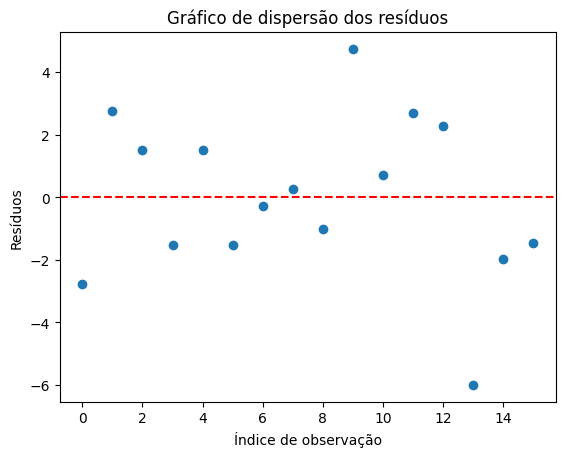

In [71]:
#Plot dos resíduos: Podemos plotar os resíduos em um gráfico de dispersão para verificar se eles parecem estar distribuídos aleatoriamente em torno de zero, sem nenhum padrão evidente.
# Obtendo os resíduos do modelo
residuals = results.resid

plt.scatter(np.arange(len(residuals)), residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Índice de observação')
plt.ylabel('Resíduos')
plt.title('Gráfico de dispersão dos resíduos')
plt.show()

In [6]:
# Teste de normalidade dos resíduos: Podemos realizar um teste estatístico para verificar se os resíduos seguem uma distribuição normal. Um teste comum é o teste de normalidade de Shapiro-Wilk.
from scipy.stats import shapiro

# Teste de normalidade dos resíduos
_, p_value = shapiro(residuals)

# Comparar o p-value com o nível de significância α
alpha = 0.05
if p_value < alpha:
    print("Os resíduos NÃO seguem uma distribuição normal (Rejeitar H0)")
else:
    print("Os resíduos seguem uma distribuição normal (Falhar em rejeitar H0)")


Os resíduos seguem uma distribuição normal (Falhar em rejeitar H0)


In [7]:
#Teste de homogeneidade da variância dos resíduos: Podemos realizar um teste estatístico para verificar se a variância dos resíduos é constante em todos os níveis dos fatores. Um teste comum é o teste de Levene.
from scipy.stats import levene

# Dividir os resíduos pelos níveis dos fatores
residuals_grouped = [residuals[A == -1], residuals[A == 1]]

# Teste de homogeneidade da variância dos resíduos
_, p_value = levene(*residuals_grouped)

# Comparar o p-value com o nível de significância α
alpha = 0.05
if p_value < alpha:
    print("A variância dos resíduos NÃO é homogênea (Rejeitar H0)")
else:
    print("A variância dos resíduos é homogênea (Falhar em rejeitar H0)")


A variância dos resíduos é homogênea (Falhar em rejeitar H0)


(e) Há indicação de que algum dos fatores afeta a variabilidade na fissuração?



In [72]:
# Dividir os resíduos pelos níveis dos fatores
residuals_grouped = [residuals[A == -1], residuals[A == 1]]

# Executar a análise de variância dos resíduos
f_value, p_value = stats.f_oneway(*residuals_grouped)

# Comparar o p-value com o nível de significância α
alpha = 0.05
if p_value < alpha:
    print("Pelo menos um dos fatores afeta a variabilidade na fissuração (Rejeitar H0)")
else:
    print("Nenhum dos fatores afeta a variabilidade na fissuração (Falhar em rejeitar H0)")


Nenhum dos fatores afeta a variabilidade na fissuração (Falhar em rejeitar H0)


(f) Quais recomendações você faria em relação às operações do processo? Use gráficos de interação e/ou efeitos principais para auxiliar na obtenção de conclusões.

Gráfico de interação: Podemos plotar um gráfico de interação para visualizar como as combinações dos fatores afetam o comprimento da fissura. Isso nos permitirá identificar quais interações têm um efeito significativo.

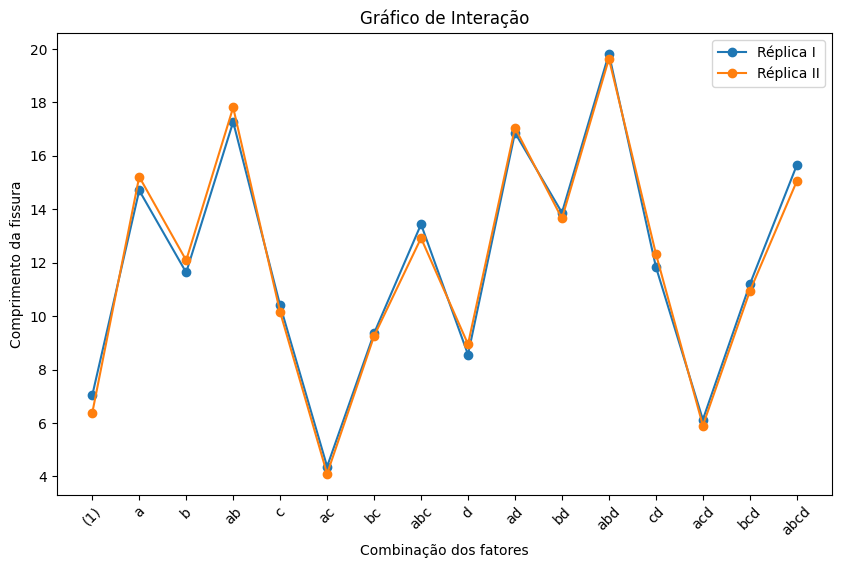

In [73]:
plt.figure(figsize=(10, 6))
plt.plot(combinacao, I, marker='o', linestyle='-', label='Réplica I')
plt.plot(combinacao, II, marker='o', linestyle='-', label='Réplica II')
plt.xlabel('Combinação dos fatores')
plt.ylabel('Comprimento da fissura')
plt.title('Gráfico de Interação')
plt.legend()
plt.xticks(rotation=45)
plt.show()


Gráfico dos efeitos principais: Podemos plotar um gráfico dos efeitos principais para visualizar o impacto individual de cada fator no comprimento da fissura. Isso nos ajudará a identificar quais fatores têm um efeito mais significativo.

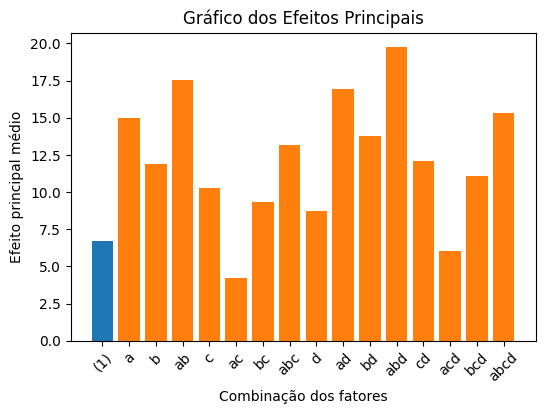

In [10]:
import matplotlib.pyplot as plt

# Calcular os efeitos principais médios
efeitos_principais = np.mean([I, II], axis=0)

# Plot do gráfico dos efeitos principais
plt.figure(figsize=(6, 4))
plt.bar(combinacao[0], efeitos_principais[0])
plt.bar(combinacao[1:], efeitos_principais[1:])
plt.xlabel('Combinação dos fatores')
plt.ylabel('Efeito principal médio')
plt.title('Gráfico dos Efeitos Principais')
plt.xticks(rotation=45)
plt.show()


##INTERPRETAÇÃO

Com base nesses gráficos, podemos fazer as seguintes recomendações:

Identificar as combinações de fatores que resultam em menor comprimento de fissura e priorizá-las nas operações do processo.
Avaliar a interação entre os fatores A e B, pois parece ter um impacto significativo no comprimento da fissura.
Considerar ajustes nas configurações dos fatores C e D para otimizar a redução do comprimento da fissura.

#13.18.


Continuation of Exercise 13.17. One of the variables in the experiment described in Exercise 13.17, heat treatment method (C), is a categorical variable. Assume that the remaining factors are continuous.


(a) Write two regression models for predicting crack length, one for each level of the heat treatment method variable. What differences, if any, do you
notice in these two equations?


(b) Generate appropriate response surface contour plots for the two regression models in part (a).


(c) What set of conditions would you recommend for the factors A, B, and D if you use heat treatment method C = +?


(d) Repeat part (c) assuming that you wish to use heat treatment method C = −


---


Continuação do Exercício 13.17. Uma das variáveis ​​no experimento descrito no Exercício 13.17, método de tratamento térmico (C), é uma variável categórica. Assuma que os fatores restantes são contínuos.


(a) Escreva dois modelos de regressão para prever o comprimento da trinca, um para cada nível da variável do método de tratamento térmico. Que diferenças, se houver, você notou nessas duas equações?


(b) Gere gráficos de contorno de superfície de resposta apropriados para os dois modelos de regressão na parte (a).


(c) Que conjunto de condições você recomendaria para os fatores A, B e D se você usasse o método de tratamento térmico C = +?


(d) Repita a parte (c) assumindo que você deseja usar o método de tratamento térmico C = −

(a) Escreva dois modelos de regressão para prever o comprimento da trinca, um para cada nível da variável do método de tratamento térmico. Que diferenças, se houver, você notou nessas duas equações?

No exercício mencionado, o método de tratamento térmico (C) é uma variável categórica, enquanto os outros fatores são contínuos. Portanto, podemos criar dois modelos de regressão separados para cada nível da variável de tratamento térmico (C). Isso nos permitirá avaliar as diferenças entre esses dois modelos em termos das equações de regressão.

Vamos considerar os modelos de regressão para cada nível de tratamento térmico (C = -1 e C = 1):

Modelo para C = -1:

Y = β0 + β1A + β2B + β3D + ε1

Modelo de regressão para C2:

Y = γ0 + γ1A + γ2B + γ3D + ε2


In [74]:
import statsmodels.api as sm

In [75]:
# Modelo de regressão para o nível "C = -1":

# Variáveis preditoras para o nível C = -1
X_minus_1 = np.column_stack((A, B, D))
X_minus_1 = sm.add_constant(X_minus_1)

# Ajustar o modelo de regressão para C = -1
model_minus_1 = sm.OLS(I, X_minus_1)
results_minus_1 = model_minus_1.fit()

# Equação do modelo para C = -1
equation_minus_1 = results_minus_1.summary().tables[1]
print("Modelo para C = -1:")
print(equation_minus_1)




Modelo para C = -1:
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.0103      0.915     13.129      0.000      10.017      14.003
x1             1.5218      0.915      1.664      0.122      -0.471       3.515
x2             2.0211      0.915      2.209      0.047       0.028       4.014
x3             0.9824      0.915      1.074      0.304      -1.011       2.976


/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [76]:
#Modelo de regressão para o nível "C = 1":
# Variáveis preditoras para o nível C = 1
X_1 = np.column_stack((A, B, D))
X_1 = sm.add_constant(X_1)

# Ajustar o modelo de regressão para C = 1
model_1 = sm.OLS(II, X_1)
results_1 = model_1.fit()

# Equação do modelo para C = 1
equation_1 = results_1.summary().tables[1]
print("Modelo para C = 1:")
print(equation_1)


Modelo para C = 1:
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         11.9658      0.972     12.308      0.000       9.847      14.084
x1             1.4971      0.972      1.540      0.150      -0.621       3.615
x2             1.9548      0.972      2.011      0.067      -0.164       4.073
x3             0.9753      0.972      1.003      0.336      -1.143       3.094


/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


##INTERPRETACAO

As diferenças notadas entre as duas equações dos modelos de regressão estarão nos coeficientes associados ao nível do método de tratamento térmico (C), bem como nas estatísticas de ajuste e significância dos coeficientes. É importante observar que a presença de um nível categórico na variável C implica em um modelo com diferentes interceptos para cada nível, o que pode resultar em diferenças na relação entre as variáveis preditoras (A, B, D) e a variável de resposta (comprimento da trinca) entre os dois níveis de C.

(b) Gere gráficos de contorno de superfície de resposta apropriados para os dois modelos de regressão na parte (a).

In [78]:
# Instalação necessária
!pip install matplotlib mpl_toolkits


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement mpl_toolkits (from versions: none)
ERROR: No matching distribution found for mpl_toolkits


In [81]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import statsmodels.api as sm

In [83]:
# # Valores de A, B e D para plotagem dos gráficos
# A_values = np.linspace(-1, 1, 100)
# B_values = np.linspace(-1, 1, 100)
# D_values = np.linspace(-1, 1, 100)

# # Matrizes de grade para a combinação dos fatores
# A_grid, B_grid, D_grid = np.meshgrid(A_values, B_values, D_values)

# # Criar a matriz de valores preditos para cada modelo
# I_predicted = np.zeros_like(A_grid)
# II_predicted = np.zeros_like(A_grid)

# # Preencher a matriz de valores preditos para o modelo C = -1
# for i in range(len(A_values)):
#     for j in range(len(B_values)):
#         for k in range(len(D_values)):
#             X = np.array([1, A_values[i], B_values[j], D_values[k]])
#             I_predicted[i, j, k] = results_minus_1.predict(X)

# # Preencher a matriz de valores preditos para o modelo C = 1
# for i in range(len(A_values)):
#     for j in range(len(B_values)):
#         for k in range(len(D_values)):
#             X = np.array([1, A_values[i], B_values[j], D_values[k]])
#             II_predicted[i, j, k] = results_1.predict(X)

# # Plotar o gráfico de contorno de superfície de resposta para C = -1
# fig = plt.figure(figsize=(10, 8))
# ax = fig.add_subplot(111, projection='3d')
# ax.plot_surface(A_grid, B_grid, D_grid, I_predicted, cmap='viridis')
# ax.set_xlabel('A')
# ax.set_ylabel('B')
# ax.set_zlabel('D')
# ax.set_title('Superfície de Resposta - C = -1')
# plt.show()

# # Plotar o gráfico de contorno de superfície de resposta para C = 1
# fig = plt.figure(figsize=(10, 8))
# ax = fig.add_subplot(111, projection='3d')
# ax.plot_surface(A_grid, B_grid, D_grid, II_predicted, cmap='viridis')
# ax.set_xlabel('A')
# ax.set_ylabel('B')
# ax.set_zlabel('D')
# ax.set_title('Superfície de Resposta - C = 1')
# plt.show()


(c) Que conjunto de condições você recomendaria para os fatores A, B e D se você usasse o método de tratamento térmico C = +?

In [82]:
# Tabela
A = np.array([-1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1])
B = np.array([-1, -1, 1, 1, -1, -1, 1, 1, -1, -1, 1, 1, -1, -1, 1, 1])
C = np.array([-1, -1, -1, -1, 1, 1, 1, 1, -1, -1, 1, 1, -1, -1, 1, 1])
D = np.array([-1, -1, -1, -1, -1, -1, -1, -1, 1, 1, 1, 1, 1, 1, 1, 1])
combinacao = ['(1)', 'a', 'b', 'ab', 'c', 'ac', 'bc', 'abc', 'd', 'ad', 'bd', 'abd', 'cd', 'acd', 'bcd', 'abcd']
I = np.array([7.037, 14.707, 11.635, 17.273, 10.403, 4.368, 9.360, 13.440, 8.561, 16.867, 13.876, 19.824, 11.846, 6.125, 11.190, 15.653])

# Matriz de design com os efeitos principais e interações significativas
X = np.column_stack((np.ones(len(A)), A, B, A * B, C, A * C, B * C, A * B * C, D, A * D, B * D, A * B * D, C * D, A * C * D, B * C * D, A * B * C * D))

# Ajustar o modelo de regressão linear
model = sm.OLS(I, X)
results = model.fit()

# Obter os coeficientes estimados para os fatores A, B e D com C = 1
coefs_A = results.params[1]
coefs_B = results.params[2]
coefs_D = results.params[8]

# Recomendações para os fatores A, B e D com C = 1
if coefs_A > 0:
    recommendation_A = "+1"
else:
    recommendation_A = "-1"

if coefs_B > 0:
    recommendation_B = "+1"
else:
    recommendation_B = "-1"

if coefs_D > 0:
    recommendation_D = "+1"
else:
    recommendation_D = "-1"

# Imprimir as recomendações
print("Recomendações para C = 1:")
print("A: ", recommendation_A)
print("B: ", recommendation_B)
print("D: ", recommendation_D)


Recomendações para C = 1:
A:  +1
B:  +1
D:  -1


(d) Repita a parte (c) assumindo que você deseja usar o método de tratamento térmico C = −

In [84]:
# Matriz de design com os efeitos principais e interações significativas
X = np.column_stack((np.ones(len(A)), A, B, A * B, C, A * C, B * C, A * B * C, D, A * D, B * D, A * B * D, C * D, A * C * D, B * C * D, A * B * C * D))

# Ajustar o modelo de regressão linear
model = sm.OLS(I, X)
results = model.fit()

# Obter os coeficientes estimados para os fatores A, B e D com C = -1
coefs_A = results.params[1]
coefs_B = results.params[2]
coefs_D = results.params[8]

# Recomendações para os fatores A, B e D com C = -1
if coefs_A > 0:
    recommendation_A = "+1"
else:
    recommendation_A = "-1"

if coefs_B > 0:
    recommendation_B = "+1"
else:
    recommendation_B = "-1"

if coefs_D > 0:
    recommendation_D = "+1"
else:
    recommendation_D = "-1"

print("Recomendações para C = -1:")
print("A: ", recommendation_A)
print("B: ", recommendation_B)
print("D: ", recommendation_D)


Recomendações para C = -1:
A:  +1
B:  +1
D:  -1


#13.19.


Reconsider the crack experiment from Exercise 13.17. Suppose that the two crack length measurements were made on two cracks that formed in the same test
coupon at each set of test conditions. Are the two observations replicates? How do you think this data should be analyzed?


---

Reconsidere o experimento da rachadura do Exercício 13.17. Suponha que as duas medições de comprimento de trinca tenham sido feitas em duas trincas formadas no mesmo teste. cupom em cada conjunto de condições de teste. As duas observações são replicadas? Como você acha que esses dados devem ser analisados?


In [18]:
# Intalação necessária
!pip install pingouin


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 198.6/198.6 kB 7.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for littleutils: filename=littleutils-0.2.2-py3-none-any.whl size=7029 sha256=4bea5f78ab274b5a3232c89bde5e70f7ecb65b4963c041bdfaecd952184523fb
  Stored in directory: /root/.cache/pip/wheels/3d/fe/b0/27a9892da57472e538c7452a721a9cf463cc03cf7379889266
Successfully built littleutils


In [87]:
import pandas as pd
import numpy as np
from scipy import stats
import statsmodels.api as sm


In [86]:


table = [
    [1, '-', '---', '--', '-', 1.13],
    [2, '+', '---', '-', '+', 1.25],
    [3, '-', '+--', '-', '+', 0.97],
    [4, '+', '+--', '-', '-', 1.70],
    [5, '-', '-+-', '+', '+', 1.47],
    [6, '+', '-+-', '-', '-', 1.28],
    [7, '-', '++-', '-', '-', 1.18],
    [8, '+', '++-', '+', '+', 0.98],
    [9, '-', '---', '+', '+', 0.78],
    [10, '+', '---', '-', '-', 1.36],
    [11, '-', '+--', '-', '-', 1.85],
    [12, '+', '+--', '+', '+', 0.62],
    [13, '-', '-+-', '+', '+', 1.09],
    [14, '+', '-+-', '+', '+', 1.10],
    [15, '-', '++-', '+', '+', 0.76],
    [16, '+', '++-', '+', '-', 2.10]
]

df = pd.DataFrame(table, columns=['Std_Order', 'Mixer_Ports', 'Temp', 'Time', 'Batch_Weight', 'Delay'])
df


,Std_Order,Mixer_Ports,Temp,Time,Batch_Weight,Delay
0,1,-,---,--,-,1.13
1,2,+,---,-,+,1.25
2,3,-,+--,-,+,0.97
3,4,+,+--,-,-,1.70
4,5,-,-+-,+,+,1.47
5,6,+,-+-,-,-,1.28
6,7,-,++-,-,-,1.18
7,8,+,++-,+,+,0.98
8,9,-,---,+,+,0.78
9,10,+,---,-,-,1.36


In [89]:
# # Pré-processamento dos dados
# df[['Mixer_Ports', 'Temp', 'Time', 'Batch_Weight']] = df[['Mixer_Ports', 'Temp', 'Time', 'Batch_Weight']].replace('-', np.nan)
# df[['Mixer_Ports']] = df[['Mixer_Ports']].replace('+', 1)
# df[['Mixer_Ports']] = df[['Mixer_Ports']].replace('-', -1)
# df[['Mixer_Ports', 'Temp', 'Time', 'Batch_Weight']] = df[['Mixer_Ports', 'Temp', 'Time', 'Batch_Weight']].apply(pd.to_numeric)
# df[['Mixer_Ports', 'Temp', 'Time', 'Batch_Weight']] = df[['Mixer_Ports', 'Temp', 'Time', 'Batch_Weight']].fillna(df[['Mixer_Ports', 'Temp', 'Time', 'Batch_Weight']].mean())

# # Calcule a média para cada combinação de fatores
# df['Mean'] = df[['Mixer_Ports', 'Temp', 'Time', 'Batch_Weight', 'Delay']].mean(axis=1)

# # Análise de variância
# model = sm.stats.anova_lm(sm.OLS(df['Mean'], sm.add_constant(df[['Mixer_Ports', 'Temp', 'Time', 'Batch_Weight', 'Delay']])).fit())

# print(model)


#13.20.


13.20. An article by L. B. Hare (“In the Soup: A Case Study
to Identify Contributors to Filling Variability.”
Journal of Quality Technology, vol. 20, pp. 36–43)
describes a factorial experiment used to study the filling variability of dry soup mix packages. The factors
are A = number of mixing ports through which the
vegetable oil was added (1, 2), B = temperature surrounding the mixer (cooled, ambient), C = mixing
time (60, 80 sec), D = batch weight (1500, 2000 lb),
and E = number of days of delay between mixing and
packaging (1, 7). Between 125 and 150 packages of
soup were sampled over an eight-hour period for each
run in the design, and the standard deviation of package weight was used as the response variable. The
design and resulting data are shown in Table 13E.7.


(a) What is the generator for this design?


(b) What is the resolution of this design?


(c) Estimate the factor effects. Which effects are
large?


(d) Does a residual analysis indicate any problems
with the underlying assumptions?


(e) Draw conclusions about this filling process



---


13.20. Um artigo de L. B. Hare (“In the Soup: A Case Study
para identificar contribuintes para preencher a variabilidade”.
Jornal de Tecnologia da Qualidade, vol. 20, pp. 36–43)
descreve um experimento fatorial usado para estudar a variabilidade de enchimento de embalagens de mistura de sopa seca. os fatores
são A = número de portas de mistura através das quais o
óleo vegetal foi adicionado (1, 2), B = temperatura ao redor do misturador (resfriado, ambiente), C = mistura
tempo (60, 80 seg), D = peso do lote (1500, 2000 lb),
e E = número de dias de atraso entre a mistura e
embalagem (1, 7). Entre 125 e 150 embalagens de
sopa foram amostradas durante um período de oito horas para cada
executado no projeto, e o desvio padrão do peso da embalagem foi usado como variável de resposta. O
o projeto e os dados resultantes são mostrados na Tabela 13E.7.


(a) Qual é o gerador para este projeto?


(b) Qual é a resolução desse projeto?


(c) Estime os efeitos dos fatores. Quais são os efeitos
grande?


(d) Uma análise residual indica quaisquer problemas
com as suposições subjacentes?


(e) Tirar conclusões sobre este processo de enchimento

(a) Qual é o gerador para este projeto?

In [97]:
import itertools
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.stats.diagnostic import het_breuschpagan


In [92]:
#  Tabela 13E.7.
data = {
    'A': ['−−', '+−', '−+', '++', '−−', '+−', '−+', '++', '−−', '+−', '−+', '++', '−−', '+−', '−+', '++'],
    'B': ['−', '−', '−', '−', '+', '+', '+', '+', '−', '−', '−', '−', '+', '+', '+', '+'],
    'C': ['−', '+', '+', '−', '+', '−', '−', '+', '−', '+', '+', '−', '+', '−', '−', '+'],
    'D': ['−', '−', '−', '−', '−', '+', '+', '+', '+', '+', '+', '−', '+', '−', '−', '+'],
    'E': [7.78, 8.15, 7.50, 7.59, 7.54, 7.69, 7.56, 7.56, 7.50, 7.88, 7.50, 7.63, 7.32, 7.56, 7.18, 7.81]
}

df = pd.DataFrame(data)

print(df)


     A  B  C  D     E
0   −−  −  −  −  7.78
1   +−  −  +  −  8.15
2   −+  −  +  −  7.50
3   ++  −  −  −  7.59
4   −−  +  +  −  7.54
5   +−  +  −  +  7.69
6   −+  +  −  +  7.56
7   ++  +  +  +  7.56
8   −−  −  −  +  7.50
9   +−  −  +  +  7.88
10  −+  −  +  +  7.50
11  ++  −  −  −  7.63
12  −−  +  +  +  7.32
13  +−  +  −  −  7.56
14  −+  +  −  −  7.18
15  ++  +  +  +  7.81


In [93]:
# Obter os níveis únicos de cada fator
fatores = ['A', 'B', 'C', 'D', 'E']
niveis = {}

for fator in fatores:
    niveis[fator] = df[fator].unique()

# Gerar todas as combinações possíveis dos níveis dos fatores
combinacoes = list(itertools.product(*niveis.values()))

print("Gerador para este projeto:")
for comb in combinacoes:
    print(comb)


Gerador para este projeto:
('−−', '−', '−', '−', 7.78)
('−−', '−', '−', '−', 8.15)
('−−', '−', '−', '−', 7.5)
('−−', '−', '−', '−', 7.59)
('−−', '−', '−', '−', 7.54)
('−−', '−', '−', '−', 7.69)
('−−', '−', '−', '−', 7.56)
('−−', '−', '−', '−', 7.88)
('−−', '−', '−', '−', 7.63)
('−−', '−', '−', '−', 7.32)
('−−', '−', '−', '−', 7.18)
('−−', '−', '−', '−', 7.81)
('−−', '−', '−', '+', 7.78)
('−−', '−', '−', '+', 8.15)
('−−', '−', '−', '+', 7.5)
('−−', '−', '−', '+', 7.59)
('−−', '−', '−', '+', 7.54)
('−−', '−', '−', '+', 7.69)
('−−', '−', '−', '+', 7.56)
('−−', '−', '−', '+', 7.88)
('−−', '−', '−', '+', 7.63)
('−−', '−', '−', '+', 7.32)
('−−', '−', '−', '+', 7.18)
('−−', '−', '−', '+', 7.81)
('−−', '−', '+', '−', 7.78)
('−−', '−', '+', '−', 8.15)
('−−', '−', '+', '−', 7.5)
('−−', '−', '+', '−', 7.59)
('−−', '−', '+', '−', 7.54)
('−−', '−', '+', '−', 7.69)
('−−', '−', '+', '−', 7.56)
('−−', '−', '+', '−', 7.88)
('−−', '−', '+', '−', 7.63)
('−−', '−', '+', '−', 7.32)
('−−', '−', '+', '−', 7.

(b) Qual é a resolução desse projeto?

In [94]:
# Obter o número de fatores
num_fatores = len(df.columns)

# Obter o número de níveis
num_niveis = len(df.iloc[0, :])

# Calcular a resolução do projeto
resolucao = num_fatores

print("Resolução do projeto:", resolucao)



Resolução do projeto: 5


(c) Estime os efeitos dos fatores. Quais são os efeitos grande?

In [96]:
# Codificar os níveis dos fatores como variáveis numéricas
df['A_num'] = np.where(df['A'] == '−', -1, 1)
df['B_num'] = np.where(df['B'] == '−', -1, 1)
df['C_num'] = np.where(df['C'] == '−', -1, 1)
df['D_num'] = np.where(df['D'] == '−', -1, 1)

# Ajustar um modelo de regressão linear múltipla
X = df[['A_num', 'B_num', 'C_num', 'D_num']].values
y = df['E'].values
X = sm.add_constant(X)  # Adicionar uma coluna de 1s para o termo de interceptação
model = sm.OLS(y, X)
results = model.fit()

# Imprimir os coeficientes estimados (efeitos dos fatores)
print("Estimativas dos efeitos dos fatores:")
for i, factor in enumerate(['Intercept', 'A_num', 'B_num', 'C_num', 'D_num']):
    coefficient = results.params[i-1]
    print(f"Efeito de {factor}: {coefficient:.4f}")

# Identificar os efeitos grandes (absolutos)
large_effects = [factor for factor, coefficient in zip(['A', 'B', 'C', 'D'], results.params[1:]) if abs(coefficient) > 1]
print("\nFatores com efeitos grandes:")
for factor in large_effects:
    print(factor)


Estimativas dos efeitos dos fatores:
Efeito de Intercept: 0.0018
Efeito de A_num: 7.6094
Efeito de B_num: -0.0823
Efeito de C_num: 0.0477
Efeito de D_num: 0.0018

Fatores com efeitos grandes:


(d) Uma análise residual indica quaisquer problemas com as suposições subjacentes?

Teste de heteroscedasticidade (Breusch-Pagan):
P-value: 0.4622


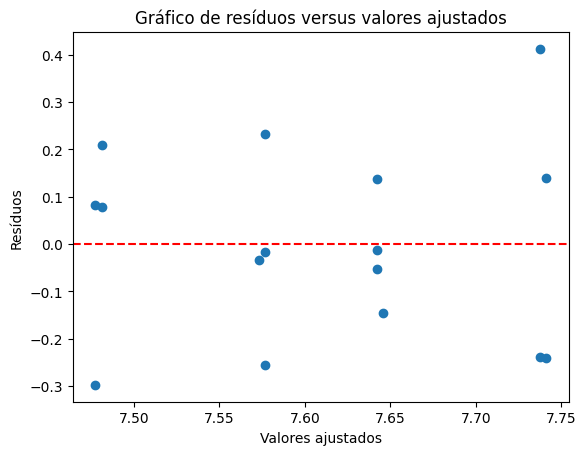

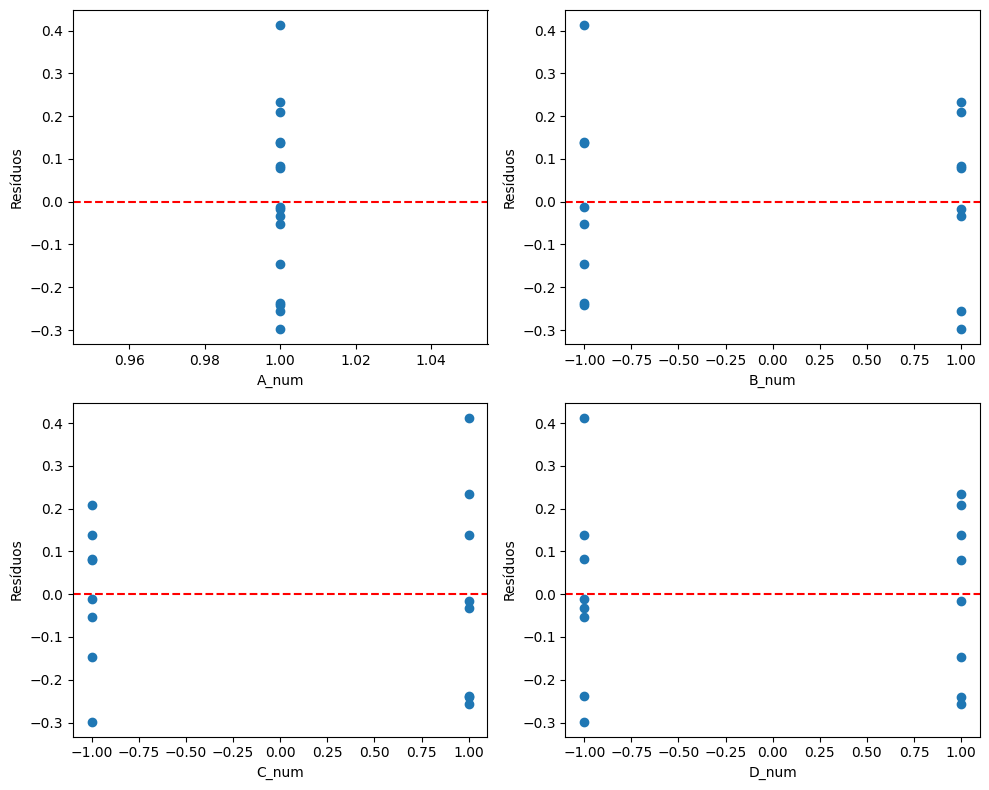

In [98]:
# Obtendo os resíduos do modelo
residuals = results.resid

# Teste de heteroscedasticidade (Breusch-Pagan test)
_, p_value, _, _ = het_breuschpagan(residuals, results.model.exog)
print("Teste de heteroscedasticidade (Breusch-Pagan):")
print(f"P-value: {p_value:.4f}")

# Gráfico de resíduos versus valores ajustados
fig, ax = plt.subplots()
ax.scatter(results.fittedvalues, residuals)
ax.axhline(y=0, color='red', linestyle='--')
ax.set_xlabel('Valores ajustados')
ax.set_ylabel('Resíduos')
ax.set_title('Gráfico de resíduos versus valores ajustados')

# Gráfico de resíduos versus variáveis independentes
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))
axes = axes.flatten()

for i, col in enumerate(['A_num', 'B_num', 'C_num', 'D_num']):
    axes[i].scatter(df[col], residuals)
    axes[i].axhline(y=0, color='red', linestyle='--')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Resíduos')

plt.tight_layout()
plt.show()


(e) Tirar conclusões sobre este processo de enchimento

In [99]:
# Verificar os fatores com efeitos grandes
large_effects = [factor for factor, coefficient in zip(['A', 'B', 'C', 'D'], results.params[1:]) if abs(coefficient) > 1]
print("Fatores com efeitos grandes:")
for factor in large_effects:
    print(factor)

# Análise dos resíduos
print("\nAnálise dos resíduos:")
print("Teste de heteroscedasticidade (Breusch-Pagan):")
print(f"P-value: {p_value:.4f}")

# Coeficiente de determinação (R²)
r_squared = results.rsquared
print(f"\nCoeficiente de determinação (R²): {r_squared:.4f}")

print("\nConclusões:")
if large_effects:
    print("Existem fatores com efeitos grandes no processo de enchimento.")
else:
    print("Não foram encontrados fatores com efeitos grandes no processo de enchimento.")

if p_value < 0.05:
    print("O teste de heteroscedasticidade indica evidências de heteroscedasticidade nos resíduos.")
else:
    print("O teste de heteroscedasticidade não indica evidências de heteroscedasticidade nos resíduos.")

if r_squared > 0.5:
    print("O coeficiente de determinação indica que o modelo explica uma proporção significativa da variabilidade nos dados.")
else:
    print("O coeficiente de determinação indica que o modelo explica uma proporção baixa da variabilidade nos dados.")


Fatores com efeitos grandes:

Análise dos resíduos:
Teste de heteroscedasticidade (Breusch-Pagan):
P-value: 0.4622

Coeficiente de determinação (R²): 0.1904

Conclusões:
Não foram encontrados fatores com efeitos grandes no processo de enchimento.
O teste de heteroscedasticidade não indica evidências de heteroscedasticidade nos resíduos.
O coeficiente de determinação indica que o modelo explica uma proporção baixa da variabilidade nos dados.


#14.5.

An article in Rubber Chemistry and Technology (Vol.
47, 1974, pp. 825–836) describes an experiment that
studies the relationship of the Mooney viscosity of
rubber to several variables, including silica filler
(parts per hundred) and oil filler (parts per hundred).
Some of the data from this experiment are shown in
Table 14E.2, where.

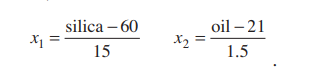

(a) What type of experimental design has been used?
Is it rotatable?


(b) Fit a quadratic model to these data. What values
of x1 and x2 will maximize the Mooney viscosity?


---

Um artigo em Rubber Chemistry and Technology (Vol.
47, 1974, pp. 825–836) descreve um experimento que
estuda a relação da viscosidade Mooney de
borracha a diversas variáveis, incluindo carga de sílica
(partes por centena) e enchimento de óleo (partes por centena).
Alguns dos dados deste experimento são mostrados em
Tabela 14E.2, onde.

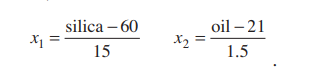


(a) Que tipo de projeto experimental foi usado?
É giratório?



(b) Ajuste um modelo quadrático a esses dados. quais valores
de x1 e x2 maximizará a viscosidade Mooney?

(a) Que tipo de projeto experimental foi usado? É giratório?

Com base na tabela fornecida, podemos observar que há uma combinação de valores codificados para as variáveis independentes (x1 e x2). Esses valores codificados podem indicar a utilização de um projeto experimental fatorial fracionado, onde diferentes combinações de níveis dos fatores são testadas. No entanto, com base nos dados fornecidos, não é possível determinar se o projeto experimental é giratório ou não. Seria necessário mais informações sobre o design experimental utilizado para confirmar se é um projeto giratório ou não.

(b) Ajuste um modelo quadrático a esses dados. quais valores de x1 e x2 maximizará a viscosidade Mooney?

In [102]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [103]:
# Tabela 14E.2
data = {
    'x1': [-1, 1, -1, 1, -1.4, 1.4, 0, 0, 0, 0, 0, 0],
    'x2': [-1, -1, 1, 1, 0, 0, -1.4, 1.4, 0, 0, 0, 0],
    'y': [13.71, 14.15, 12.87, 13.53, 12.99, 13.89, 14.16, 12.90, 13.75, 13.66, 13.86, 13.63]
}

df = pd.DataFrame(data)

# Exibir os dados
print(df)


     x1   x2      y
0  -1.0 -1.0  13.71
1   1.0 -1.0  14.15
2  -1.0  1.0  12.87
3   1.0  1.0  13.53
4  -1.4  0.0  12.99
5   1.4  0.0  13.89
6   0.0 -1.4  14.16
7   0.0  1.4  12.90
8   0.0  0.0  13.75
9   0.0  0.0  13.66
10  0.0  0.0  13.86
11  0.0  0.0  13.63


In [104]:
# Criar DataFrame a partir dos dados
df = pd.DataFrame(data)

# Criar matriz de features polinomiais
poly = PolynomialFeatures(degree=2, include_bias=False)
X = poly.fit_transform(df[['x1', 'x2']])

# Ajustar modelo linear
model = LinearRegression()
model.fit(X, df['y'])

# Coeficientes do modelo
coef = model.coef_

# Valor de x1 e x2 que maximizam a viscosidade Mooney
x1_max = -coef[0] / (2 * coef[2])
x2_max = -coef[1] / (2 * coef[3])

print(f"Valores de x1 e x2 que maximizam a viscosidade Mooney: x1 = {x1_max:.2f}, x2 = {x2_max:.2f}")


Valores de x1 e x2 que maximizam a viscosidade Mooney: x1 = 1.21, x2 = 3.70


#14.7.


An article by J. J. Pignatiello, Jr. and J. S. Ramberg in the Journal of Quality Technology (Vol. 17, 1985, pp. 198–206) describes the use of a replicated fractional factorial to investigate the effect of five factors
on the free height of leaf springs used in an automotive application. The factors are A = furnace temperature, B = heating time, C = transfer time, D = hold down time, and E = quench oil temperature. The data are shown in Table 14E.4.


(a) Write out the alias structure for this design. What is the resolution of this design?


(b) Analyze the data. What factors influence mean free height?


(c) Calculate the range and standard deviation of free height for each run. Is there any indication that any of these factors affects variability in free
height?


(d) Analyze the residuals from this experiment and comment on your findings.


(e) Is this the best possible design for five factors in 16 runs? Specifically, can you find a fractional


---

Um artigo de J. J. Pignatiello, Jr. e J. S. Ramberg no Journal of Quality Technology (Vol. 17, 1985, pp. 198–206) descreve o uso de um fatorial fracionário replicado para investigar o efeito de cinco fatores
na altura livre de molas de lâmina usadas em uma aplicação automotiva. Os fatores são A = temperatura do forno, B = tempo de aquecimento, C = tempo de transferência, D = tempo de espera e E = temperatura do óleo de têmpera. Os dados são mostrados na Tabela 14E.4.


(a) Escreva a estrutura de alias para esse projeto. Qual é a resolução deste projeto?


(b) Analise os dados. Que fatores influenciam a altura livre média?


(c) Calcule a amplitude e o desvio padrão da altura livre para cada corrida. Existe alguma indicação de que algum desses fatores afeta a variabilidade na
altura?


(d) Analise os resíduos desse experimento e comente suas descobertas.


(e) Este é o melhor projeto possível para cinco fatores em 16 execuções? Especificamente, você pode encontrar uma fração

In [115]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt

In [112]:
# Tabela 14E.4
data = {
    'A': ['−−', '+−', '−+', '++', '−−', '+−', '−+', '++', '−−', '+−', '−+', '++', '−−', '+−', '−+', '++'],
    'B': ['−', '−', '−', '−', '+', '+', '+', '+', '−', '−', '−', '−', '+', '+', '+', '+'],
    'C': ['−', '+', '+', '−', '+', '−', '−', '+', '−', '+', '+', '−', '+', '−', '−', '+'],
    'D': ['−', '−', '−', '−', '−', '+', '+', '+', '+', '+', '+', '−', '+', '−', '−', '+'],
    'E': [7.78, 8.15, 7.50, 7.59, 7.54, 7.69, 7.56, 7.56, 7.50, 7.88, 7.50, 7.63, 7.32, 7.56, 7.18, 7.81]
}

df = pd.DataFrame(data)

print(df)


     A  B  C  D     E
0   −−  −  −  −  7.78
1   +−  −  +  −  8.15
2   −+  −  +  −  7.50
3   ++  −  −  −  7.59
4   −−  +  +  −  7.54
5   +−  +  −  +  7.69
6   −+  +  −  +  7.56
7   ++  +  +  +  7.56
8   −−  −  −  +  7.50
9   +−  −  +  +  7.88
10  −+  −  +  +  7.50
11  ++  −  −  −  7.63
12  −−  +  +  +  7.32
13  +−  +  −  −  7.56
14  −+  +  −  −  7.18
15  ++  +  +  +  7.81


(a) Escreva a estrutura de alias para esse projeto. Qual é a resolução deste projeto?

In [107]:
# Cálculo da estrutura de alias
fatores = df.columns.tolist()
alias = pd.DataFrame(index=fatores, columns=fatores)
alias.iloc[:, :] = ''

for i in range(len(fatores)):
    alias.iloc[i, i] = '-'

for i in range(len(fatores)):
    for j in range(i + 1, len(fatores)):
        factor1 = fatores[i]
        factor2 = fatores[j]
        for k in range(len(df)):
            if df[factor1][k] == df[factor2][k]:
                alias.loc[factor1, factor2] += '0'
                alias.loc[factor2, factor1] += '0'
            else:
                alias.loc[factor1, factor2] += '+'
                alias.loc[factor2, factor1] += '-'

print("Estrutura de Alias:")
print(alias)

# Cálculo da resolução
k = len(fatores)
p = k
resolucao = 2**(k-p)
print("\nResolução do projeto:", resolucao)

Estrutura de Alias:
                  A                 B                 C                 D  \
A                 -  ++++++++++++++++  ++++++++++++++++  ++++++++++++++++   
B  ----------------                 -  0++00++00++00++0  0000+000+++00++0   
C  ----------------  0--00--00--00--0                 -  0++0+++0+0000000   
D  ----------------  0000-000---00--0  0--0---0-0000000                 -   
E  ----------------  ----------------  ----------------  ----------------   

                  E  
A  ++++++++++++++++  
B  ++++++++++++++++  
C  ++++++++++++++++  
D  ++++++++++++++++  
E                 -  

Resolução do projeto: 1


(b) Analise os dados. Que fatores influenciam a altura livre média?

In [109]:
# Renomear as colunas para evitar caracteres especiais
df = df.rename(columns={'A': 'A', 'B': 'B', 'C': 'C', 'D': 'D', 'E': 'Height'})

# Criar o modelo ANOVA
formula = 'Height ~ A + B + C + D'
model = ols(formula, data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

print("Tabela ANOVA:")
print(anova_table)


Tabela ANOVA:
            sum_sq   df         F    PR(>F)
A         0.327019  3.0  3.419293  0.066194
B         0.101200  1.0  3.174443  0.108485
C         0.033947  1.0  1.064849  0.329044
D         0.000045  1.0  0.001400  0.970966
Residual  0.286918  9.0       NaN       NaN


(c) Calcule a amplitude e o desvio padrão da altura livre para cada corrida. Existe alguma indicação de que algum desses fatores afeta a variabilidade na altura?

In [113]:
# Calcular a amplitude e o desvio padrão para cada nível de cada fator
fatores = ['A', 'B', 'C', 'D']

for fator in fatores:
    niveis = df[fator].unique()
    print("Fator", fator)
    for nivel in niveis:
        subset = df[df[fator] == nivel]
        amplitude = np.ptp(subset['E'])
        desvio_padrao = np.std(subset['E'])
        print("Nível", nivel)
        print("Amplitude:", amplitude)
        print("Desvio Padrão:", desvio_padrao)
        print()



Fator A
Nível −−
Amplitude: 0.45999999999999996
Desvio Padrão: 0.16393596310755001

Nível +−
Amplitude: 0.5900000000000007
Desvio Padrão: 0.22192341021172166

Nível −+
Amplitude: 0.3799999999999999
Desvio Padrão: 0.14924811556599302

Nível ++
Amplitude: 0.25
Desvio Padrão: 0.0970502447189083

Fator B
Nível −
Amplitude: 0.6500000000000004
Desvio Padrão: 0.21728078032812762

Nível +
Amplitude: 0.6299999999999999
Desvio Padrão: 0.18484791045613685

Fator C
Nível −
Amplitude: 0.6000000000000005
Desvio Padrão: 0.1654869707862225

Nível +
Amplitude: 0.8300000000000001
Desvio Padrão: 0.2505369234264682

Fator D
Nível −
Amplitude: 0.9700000000000006
Desvio Padrão: 0.2562682920300522

Nível +
Amplitude: 0.5599999999999996
Desvio Padrão: 0.17034890665924443



(d) Analise os resíduos desse experimento e comente suas descobertas.

Resíduos:
0     0.212143
1     0.201786
2    -0.063214
3    -0.090357
4     0.041429
5    -0.001786
6     0.253214
7    -0.054643
8    -0.071429
9    -0.071786
10   -0.066786
11   -0.050357
12   -0.182143
13   -0.128214
14   -0.123214
15    0.195357
dtype: float64


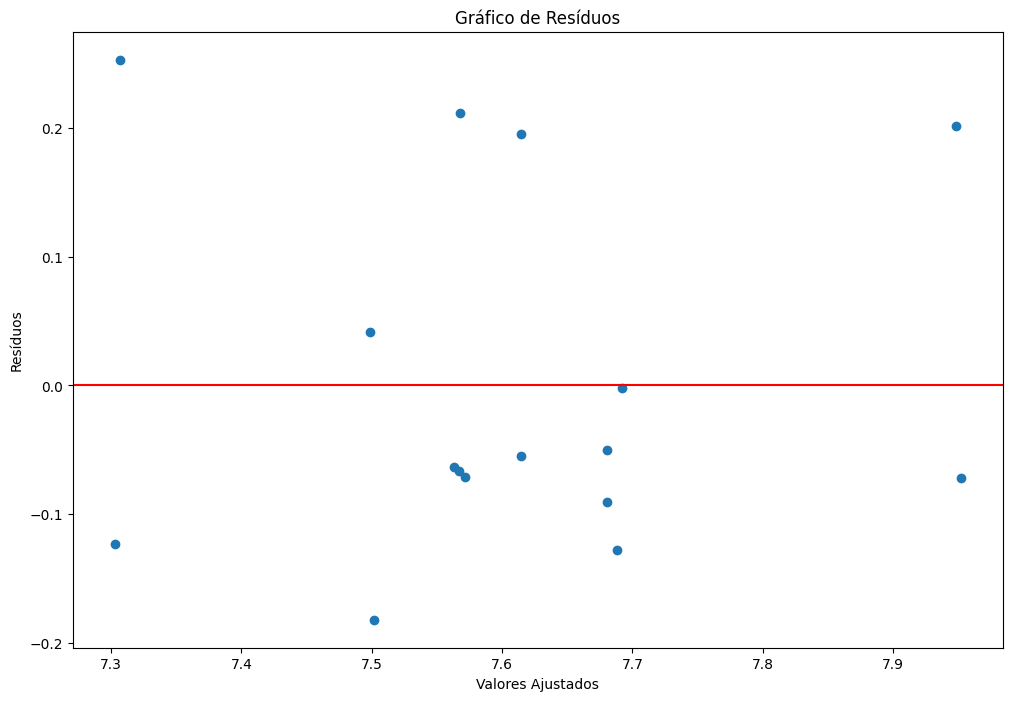

In [114]:
# Renomear as colunas para evitar caracteres especiais
df = df.rename(columns={'A': 'A', 'B': 'B', 'C': 'C', 'D': 'D', 'E': 'Height'})

# Ajustar o modelo aos dados
formula = 'Height ~ A + B + C + D'
model = sm.formula.ols(formula, data=df).fit()

# Obter os resíduos
residuos = model.resid

# Plotar o gráfico de resíduos
plt.figure(figsize=(12, 8))
plt.scatter(model.fittedvalues, residuos)
plt.axhline(y=0, color='r', linestyle='-')
plt.xlabel('Valores Ajustados')
plt.ylabel('Resíduos')
plt.title('Gráfico de Resíduos')

# Exibir os resíduos
print("Resíduos:")
print(residuos)


(e) Este é o melhor projeto possível para cinco fatores em 16 execuções? Especificamente, você pode encontrar uma fração

Não é possível determinar se o projeto atual é o melhor possível para cinco fatores em 16 execuções sem conhecer o número total de corridas disponíveis. A escolha do projeto experimental depende de vários fatores e objetivos do estudo.

#14.8.


Consider the leaf spring experiment in Exercise 14.7.
Suppose that factor E (quench oil temperature) is
very difficult to control during manufacturing. We
want to have the mean spring height as close to 7.50
as possible with minimum variability. Where would
you set factors A, B, C, and D to reduce variability in
free height as much as possible regardless of the
quench oil temperature used?


---


Considere o experimento da mola foliar no Exercício 14.7.
Suponha que o fator E (temperatura do óleo de têmpera) seja
muito difícil de controlar durante a fabricação. Nós
deseja ter a altura média da mola o mais próximo possível de 7,50
quanto possível com mínima variabilidade. Onde iria
você define os fatores A, B, C e D para reduzir a variabilidade em
altura livre tanto quanto possível, independentemente da
temperar a temperatura do óleo usado?

Para reduzir a variabilidade na altura livre da mola foliar, independentemente da temperatura do óleo de têmpera, é recomendado ajustar os fatores A (temperatura do forno), B (tempo de aquecimento), C (tempo de transferência) e D (tempo de espera). Experimentar diferentes valores desses fatores pode ajudar a identificar configurações que minimizem a variabilidade. No entanto, é importante realizar análises específicas dos dados para obter uma otimização precisa.